In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [4]:
prob1 = pd.read_csv('Problem1.csv')
prob1.head()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
0,1,10,48,2,0,0,0,2,4,B
1,2,8,25,0,0,0,1,1,0,B
2,3,20,81,0,1,19,0,1,1,B
3,4,9,34,1,0,1,0,1,2,B
4,5,18,69,3,0,1,0,1,0,B


In [5]:
prob1.shape

(28, 10)

In [6]:
prob1.describe()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,257.500000,26.285714,120.500000,3.035714,0.142857,1.392857,0.142857,2.571429,5.392857
std,254.620633,34.332640,162.859744,5.620611,0.356348,3.520725,0.356348,2.936722,9.897023
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7.750000,9.000000,43.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,257.500000,13.500000,62.500000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,507.250000,26.500000,119.500000,4.000000,0.000000,1.000000,0.000000,2.000000,6.250000
max,514.000000,169.000000,831.000000,26.000000,1.000000,19.000000,1.000000,13.000000,48.000000


# Training

In [7]:
X = prob1.drop(['label', 'num_sentences'], axis =1)

In [8]:
X

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_punctuations
0,1,10,48,2,0,0,0,4
1,2,8,25,0,0,0,1,0
2,3,20,81,0,1,19,0,1
3,4,9,34,1,0,1,0,2
4,5,18,69,3,0,1,0,0
5,6,7,39,1,0,0,0,2
6,7,10,46,4,0,2,1,2
7,8,14,70,5,0,0,0,16
8,9,0,46,0,0,0,0,0
9,10,31,173,26,0,0,1,7


In [9]:
y = prob1['num_sentences']
y

0      2
1      1
2      1
3      1
4      1
5      1
6      2
7      2
8      1
9      3
10     2
11     1
12     2
13     1
14     9
15     1
16    13
17     4
18     1
19     2
20     6
21     1
22     2
23     1
24     8
25     1
26     1
27     1
Name: num_sentences, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=10)

# Modeling

In [11]:
k_neighbors= np.arange(1,11)
train_accuracy = np.empty(10)
test_accuracy = np.empty(10)

for i, k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

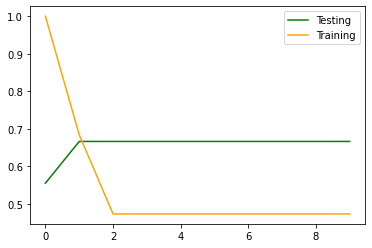

In [12]:
plt.plot(test_accuracy, color='green', label='Testing')
plt.plot(train_accuracy, color='orange', label='Training')
plt.legend()

In [13]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5555555555555556

In [14]:
y = prob1['num_sentences']
y

0      2
1      1
2      1
3      1
4      1
5      1
6      2
7      2
8      1
9      3
10     2
11     1
12     2
13     1
14     9
15     1
16    13
17     4
18     1
19     2
20     6
21     1
22     2
23     1
24     8
25     1
26     1
27     1
Name: num_sentences, dtype: int64